Shortest path from A to A: 0
Shortest path from A to B: 1
Shortest path from A to C: 3
Shortest path from A to D: 4
Shortest path from A to E: 11


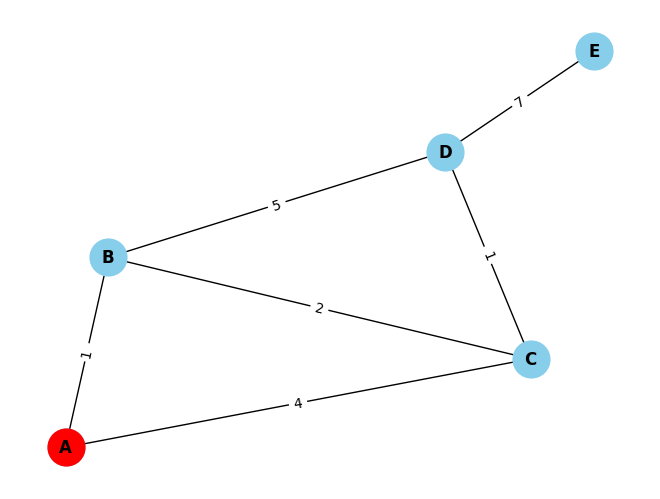

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_shortest_path(graph, start_node):
    # Inisialisasi dictionary untuk menyimpan jarak terpendek dari start_node ke setiap node lain
    shortest_paths = {node: float('infinity') for node in graph.nodes()}
    shortest_paths[start_node] = 0

    # Set dari node yang belum dikunjungi
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Pilih node dengan jarak terpendek yang belum dikunjungi
        current_node = min(unvisited_nodes, key=lambda node: shortest_paths[node])
        unvisited_nodes.remove(current_node)

        # Perbarui jarak terpendek untuk tetangga-tetangga yang terhubung
        for neighbor in graph.neighbors(current_node):
            tentative_distance = shortest_paths[current_node] + graph[current_node][neighbor]['weight']
            if tentative_distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = tentative_distance

    return shortest_paths
# Contoh penggunaan
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=1)
G.add_edge('D', 'E', weight=7)

start_node = 'A'
shortest_paths = dijkstra_shortest_path(G, start_node)

# Plot grafik
pos = nx.spring_layout(G)  # Menentukan layout grafik (Anda dapat menggunakan layout lainnya)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')

# Menambahkan label edge yang berisi bobot
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Menandai node awal
nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='red', node_size=700)

# Tampilkan hasil
for node, distance in shortest_paths.items():
    print(f'Shortest path from {start_node} to {node}: {distance}')

plt.show()
